# Data Refine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
test=pd.read_csv('C:/Users/6506/Desktop/JL/變數刪除後123/分析大表testing_data_11_flted.csv',encoding='ANSI')
train=pd.read_csv('C:/Users/6506/Desktop/JL/變數刪除後123/分析大表training_data_11_flted.csv',encoding='ANSI')
df=pd.concat([test,train])

In [3]:
null_columns=train.columns[train.isnull().any()]
#train[train.isnull().any(axis=1)][null_columns]
train.loc[train.isnull().any(axis=1),null_columns]='NA'

In [4]:
#transform category variable type
d=df.dtypes==object
i=d[d==True].index[1:]
df[i]=df[i].apply(lambda x: x.astype('category').cat.codes)
#for i in d[d==True].index[1:]:
    #df[i]=df[i].astype('category').cat.codes

In [5]:
#normalization
from sklearn import preprocessing
df.iloc[:,2:]=preprocessing.MinMaxScaler().fit_transform(df.iloc[:,2:])

In [6]:
#split data
test=df.iloc[0:len(test)]
train=df.iloc[len(test):]

In [7]:
#logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(train.iloc[:,2:], train.iloc[:,1])
y_pred=clf.predict(test.iloc[:,2:])
y_true=test.iloc[:,1]
clf.score(test.iloc[:,2:], y_true)

C:\Users\6506\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9470499243570348

In [8]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [9]:
#confusion_matrix
def Confusion_matrix(y_true, y_pred):
    class_names=unique_labels(y_true)

    np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
    plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
    plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
    plt.show()

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
accuracy = accuracy_score(y_true, y_pred)
p=precision_recall_fscore_support(y_true, y_pred)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % p[0][1])
print('Recall: %f' % p[1][1])
print('F1 score: %f' % p[2][1])

Accuracy: 0.947050
Precision: 0.392857
Recall: 0.053922
F1 score: 0.094828


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3762
           1       0.39      0.05      0.09       204

    accuracy                           0.95      3966
   macro avg       0.67      0.52      0.53      3966
weighted avg       0.92      0.95      0.93      3966



In [12]:
test.to_csv('C:/Users/6506/Desktop/test.csv',encoding='utf-8')
train.to_csv('C:/Users/6506/Desktop/train.csv',encoding='utf-8')

In [13]:
def y_train(i):
    return train[train['檢驗不合格']==i]
len(y_train(1))

825

# Design of Experiment

In [14]:
import pyDOE2
ccd=pyDOE2.ccdesign(2,center=(4,4),face='cci')

In [15]:
ccd=np.rint((ccd+1)*(len(y_train(0))-len(y_train(1)))/2+len(y_train(1)))
ccd=np.insert(ccd,[2],0,1)
ccd

array([[ 3327.,  3327.,     0.],
       [15405.,  3327.,     0.],
       [ 3327., 15405.,     0.],
       [15405., 15405.,     0.],
       [ 9366.,  9366.,     0.],
       [ 9366.,  9366.,     0.],
       [ 9366.,  9366.,     0.],
       [ 9366.,  9366.,     0.],
       [  825.,  9366.,     0.],
       [17907.,  9366.,     0.],
       [ 9366.,   825.,     0.],
       [ 9366., 17907.,     0.],
       [ 9366.,  9366.,     0.],
       [ 9366.,  9366.,     0.],
       [ 9366.,  9366.,     0.],
       [ 9366.,  9366.,     0.]])

In [16]:
import warnings
from sklearn.feature_selection import f_regression

class Logistic(object):
    def __init__(self):
        y_true=test.iloc[:,1]

    def __call__(self,m,n):
        train=pd.concat([y_train(0).sample(m),y_train(1).sample(n,replace=True)])
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(train.iloc[:,2:], train.iloc[:,1])
            y_pred=clf.predict(test.iloc[:,2:])
            p=precision_recall_fscore_support(y_true, y_pred)
            print('F1 score: %f' % p[2][1])
            
            #p-value
            self.pv=f_regression(train.iloc[:,2:], train.iloc[:,1])[1]
            self.clf=clf
            self.y_pred=y_pred
        
        return p[2][1]
    
logistic=Logistic()

In [17]:
for i in range(len(ccd)):
    if i<9:
        print('Trial %d   ' %(i+1), end='')
    else:
        print('Trial %d  ' %(i+1), end='')
    ccd[i][2]=logistic(int(ccd[i][0]),int(ccd[i][1]))

Trial 1   F1 score: 0.196911
Trial 2   F1 score: 0.269406
Trial 3   F1 score: 0.120968
Trial 4   F1 score: 0.201065
Trial 5   F1 score: 0.198083
Trial 6   F1 score: 0.203279
Trial 7   F1 score: 0.204756
Trial 8   F1 score: 0.197309
Trial 9   F1 score: 0.104762
Trial 10  F1 score: 0.284078
Trial 11  F1 score: 0.201342
Trial 12  F1 score: 0.150502
Trial 13  F1 score: 0.203540
Trial 14  F1 score: 0.189422
Trial 15  F1 score: 0.197516
Trial 16  F1 score: 0.199485


In [18]:
ccd=pd.DataFrame(ccd)
ccd

,0,1,2
0,3327.0,3327.0,0.196911
1,15405.0,3327.0,0.269406
2,3327.0,15405.0,0.120968
3,15405.0,15405.0,0.201065
4,9366.0,9366.0,0.198083
5,9366.0,9366.0,0.203279
6,9366.0,9366.0,0.204756
7,9366.0,9366.0,0.197309
8,825.0,9366.0,0.104762
9,17907.0,9366.0,0.284078


In [19]:
from sklearn.linear_model import LinearRegression
X=ccd.iloc[:,:2]
y=ccd.iloc[:,2]
l1 = LinearRegression().fit(X, y)
l1.score(X,y)

0.8982161116176238

In [20]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
l2 = LinearRegression().fit(X_poly, y) 
l2.score(X_poly, y)

0.919106460718504

# Linear Programming

In [21]:
#return l2coef(0)+a*l2coef(1)+b*l2coef(2)+a*a*l2coef(3)+a*b*l2coef(4)+b*b*l2coef(5)

In [22]:
l1coef=lambda n:l1.coef_[n]
l2coef=lambda n:l2.coef_[n]

def eggholder(x):
    c=l2coef(0)+x[0]*l2coef(1)+x[1]*l2coef(2)+x[0]*x[0]*l2coef(3)+x[0]*x[1]*l2coef(4)+x[1]*x[1]*l2coef(5)
    #c=x[0]*l1coef(0)+x[1]*l1coef(1)
    return -c

bounds = [(len(y_train(1)), (len(y_train(0)))), (len(y_train(1)), (len(y_train(0))))]

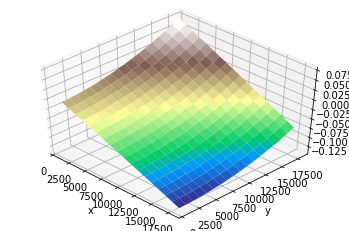

In [23]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(len(y_train(1)), (len(y_train(0))),1000)
y = np.arange(len(y_train(1)), (len(y_train(0))),1000)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

In [24]:
from scipy import optimize
results = dict()

bounds = [len(y_train(1)), (len(y_train(0)))]
results['shgo'] = optimize.least_squares(eggholder, bounds)
results['shgo']

 active_mask: array([0., 0.])
        cost: 5.756019529883235e-07
         fun: array([0.00107294])
        grad: array([-9.10307231e-09,  6.96610072e-09])
         jac: array([[-8.48421890e-06,  6.49252488e-06]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 5
        njev: 3
  optimality: 9.103072310660583e-09
      status: 1
     success: True
           x: array([ 5624.06215448, 13210.62722086])

In [25]:
avg=0;avgpv=0
for n in range(10):
    avg+=logistic(int(results['shgo']['x'][0]),int(results['shgo']['x'][1]))*0.1
    avgpv+=logistic.pv*0.1
avg

F1 score: 0.145875
F1 score: 0.147214
F1 score: 0.137134
F1 score: 0.142746
F1 score: 0.144869
F1 score: 0.145663
F1 score: 0.144418
F1 score: 0.140921
F1 score: 0.144088
F1 score: 0.141390


0.14343187338512958

In [26]:
#P-value
b=pd.DataFrame(avgpv)
a=pd.DataFrame(test.iloc[:,2:].columns)
c=pd.DataFrame(logistic.clf.coef_).T
p=pd.concat([a,b,c],axis=1)
p.columns=['factor','p-value','coef']
p.to_csv('C:/Users/6506/Desktop/abc.csv',encoding='ANSI')

In [27]:
#drop column
#test=test.drop(columns=p[p['p-value']>0.05].iloc[:,0].tolist())
#train=train.drop(columns=p[p['p-value']>0.05].iloc[:,0].tolist())

Confusion matrix, without normalization
[[1613 2149]
 [  25  179]]
Normalized confusion matrix
[[0.43 0.57]
 [0.12 0.88]]


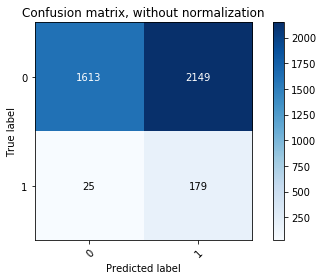

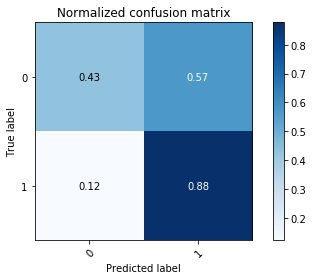

In [28]:
Confusion_matrix(y_true, logistic.y_pred)

In [29]:
print(classification_report(y_true, logistic.y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.43      0.60      3762
           1       0.08      0.88      0.14       204

    accuracy                           0.45      3966
   macro avg       0.53      0.65      0.37      3966
weighted avg       0.94      0.45      0.57      3966



In [30]:
results['shgo'].x

array([ 5624.06, 13210.63])

In [31]:
len(train)*0.3

5619.599999999999

In [32]:
from imblearn.over_sampling import SMOTE
X_train,Y_train=train.iloc[:,2:], train.iloc[:,1]
sm = SMOTE(sampling_strategy=len(train)*0.3/len(y_train(0)),random_state=42)
X_res, y_res = sm.fit_resample(train.iloc[:,2:], train.iloc[:,1])
a=pd.concat([train.iloc[:,0],pd.DataFrame(y_res,columns=[Y_train.name]),pd.DataFrame(X_res,columns=X_train.columns)],axis=1)
a.loc[a.iloc[:,1]==1].head()

,簽審核准許可文件編號,檢驗不合格,每公斤台幣完稅價格,台幣完稅價格,總淨重公斤數,進口商累積報單數,進口商累積總中分類數,進口商累積貨品號列數,資本額,運輸天數,...,報關行累積進口商家數,有無報驗代理人,進口商累積報驗註銷數,製造廠累積報驗註銷數,報關行累積報驗註銷數,進口商累積書審不合格數,製造廠累積書審不合格數,報關行累積書審不合格數,製造廠累積扣押放棄退運批數,報關行累積扣押放棄退運批數
31,IFB00H10720803,1,0.000394,0.005192,0.020899,0.001019,0.050000,0.011299,0.006167,0.016371,...,0.057534,1.0,0.011696,0.0,0.010321,0.003697,0.0,0.011905,0.0,0.0
76,IFB00D17296400,1,0.018181,0.000041,0.000004,0.001761,0.650000,0.342750,0.013333,0.002729,...,0.214912,1.0,0.005848,0.0,0.067661,0.003697,0.0,0.062629,0.0,0.0
101,IFB00P10339000,1,0.000308,0.002010,0.010314,0.000535,0.066667,0.041431,0.000005,0.002729,...,0.025284,1.0,0.000000,0.0,0.010321,0.000000,0.0,0.001553,0.0,0.0
138,IFB00D10369807,1,0.003140,0.000021,0.000011,0.000138,0.100000,0.028249,0.002050,0.038199,...,0.052116,1.0,0.000000,0.0,0.003440,0.000000,0.0,0.000000,0.0,0.0
146,IFB00D13357700,1,0.000990,0.000350,0.000565,0.001433,0.183333,0.064030,0.002050,0.024557,...,0.151445,1.0,0.000000,0.0,0.024083,0.000000,0.0,0.027433,0.0,0.0


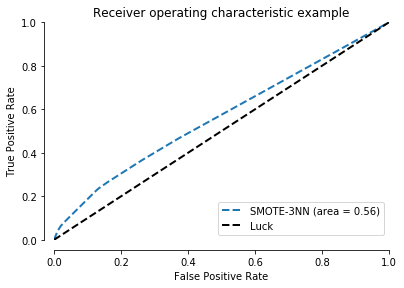

In [33]:
from scipy import interp
from sklearn import neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

class DummySampler:

    def sample(self, X, y):
        return X, y

    def fit(self, X, y):
        return self

    def fit_resample(self, X, y):
        return self.sample(X, y)

# Load the dataset
X = train.iloc[:,2:]
y = train.iloc[:,1]

RANDOM_STATE = 42
LW = 2
cv = StratifiedKFold(n_splits=3)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

classifier = ['3NN', neighbors.KNeighborsClassifier(3)]


samplers = [
#      ['Standard', DummySampler()],
#     ['ADASYN', ADASYN(random_state=RANDOM_STATE)],
#     ['ROS', RandomOverSampler(random_state=RANDOM_STATE)],
    ['SMOTE', SMOTE(random_state=RANDOM_STATE)],
]

pipelines = [
    ['{}-{}'.format(sampler[0], classifier[0]),
     make_pipeline(sampler[1], classifier[1])]
    for sampler in samplers
]

for name, pipeline in pipelines:
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        probas_ = pipeline.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    plt.plot(mean_fpr, mean_tpr, linestyle='--',
             label='{} (area = %0.2f)'.format(name) % mean_auc, lw=LW)

plt.plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k',
         label='Luck')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.legend(loc="lower right")

plt.show()

In [1]:
from scipy import interp
from sklearn import neighbors

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

RANDOM_STATE=42

samplers = [
    ['RUS', RandomUnderSampler(random_state=RANDOM_STATE)],
]

samplers2 = [
#     ['Standard', DummySampler()],
#     ['ADASYN', ADASYN(random_state=RANDOM_STATE)],
    ['ROS', RandomOverSampler(random_state=RANDOM_STATE)],
    ['SMOTE', SMOTE(random_state=RANDOM_STATE)],
]

classifiers = [
    ['3NN', neighbors.KNeighborsClassifier(3)],
    ['2NN', neighbors.KNeighborsClassifier(2)],
]

pipelines = [
    ['{}-{}-{}'.format(sampler[0],sampler2[0], classifier[0]),
     make_pipeline(sampler[1],sampler2[1], classifier[1])]
    for sampler in samplers for sampler2 in samplers2 for classifier in classifiers
]

In [9]:
pipelines[1][1]

Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=42, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('randomoversampler',
                 RandomOverSampler(random_state=42, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))],
         verbose=False)

In [55]:
m,n=5,5
pipelines[0][1].fit_resample(X, y)
len(X)

18732

In [38]:
clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
X=train.iloc[:,2:];y=train.iloc[:,1]
m=8;n=2
DummySampler().fit(X, y).y

12315


AttributeError: 'DummySampler' object has no attribute 'y'

In [ ]:
Confusion_matrix(y_true, clf.predict(X))

In [119]:
def ratio_multiplier(y):
    target_stats = Counter(y)
#     multiplier = {1: 0.9}    
#     for key, value in target_stats.items():
#         if key in multiplier:
#             target_stats[key] = int(value * multiplier[key])
    target_stats[0]=18000
    target_stats[1]=20000
    return target_stats

In [89]:
X_res, y_res = (RandomOverSampler(sampling_strategy=ratio_multiplier)
                .fit_resample(X, y))
len(y_res[y_res==1])

C:\Users\6506\AppData\Local\Continuum\anaconda3\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning: After over-sampling, the number of samples (18000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 17907)
  n_samples_majority))
C:\Users\6506\AppData\Local\Continuum\anaconda3\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning: After over-sampling, the number of samples (20000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 17907)
  n_samples_majority))


20000